In [28]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
import numpy as np
from tools import *
from methods import generalized_eig_extract
import matplotlib.pyplot as plt
set_seaborn()

In [30]:
noise = 1e-6
e_s = np.array([1.5, -0.8, -0.15])
a_s = np.array([0.01, 1.0, 0.2])
dim = 9
dt = 0.1
time = np.arange(0, 3+dt, dt)
N = len(time)
true_eigs = np.sort(np.exp(e_s*dt))[::-1]
noise_cartoon_factor = 2e4  # used to make noise look bigger for display purposes

# build X_series
components = []
for i in range(len(e_s)):
    c = exp_f(time, e_s[i], a_s[i])
    components.append(c)
X_series = np.sum(components, axis=0)


# build Y_series
Y_series = components[np.argmax(e_s)]
Y_series = Y_series[dim:]


In [31]:
# ALGO
noise_draws = 1000
thetas, preds = [], []
for _ in range(noise_draws):
    noise_series = noise * np.random.randn(N)
    X_series_noise = X_series + noise_series

    P_series, theta = generalized_eig_extract(X_series_noise, dim)
    theta /= theta[-1]
    P_series /= P_series[0]/Y_series[0]
    thetas.append(theta.real)
    preds.append(P_series)

theta = np.mean(thetas, axis=0)
pred_series = np.mean(preds, axis=0)


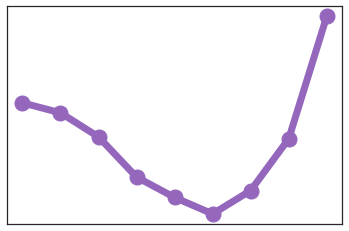

In [32]:
plt.plot(np.arange((-len(theta)+1)*dt,dt, dt), theta, '.-', lw=7, ms=30, color='tab:purple');
plt.xticks([]); plt.yticks([]); 
plt.show()

In [33]:
ylims = [-0.1,1.3]

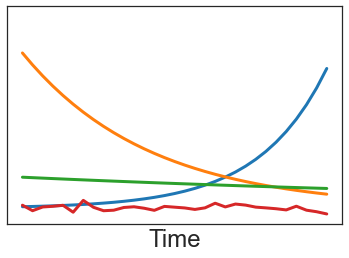

In [34]:
[plt.plot(time, c, label=f'C{i}', lw=3) for i,c in enumerate(components)]
plt.plot(time, noise_series*noise_cartoon_factor, label='Noise', lw=3)
plt.ylim(ylims)
# plt.legend()
plt.xlabel('Time', fontsize=24)
plt.xticks([]); plt.yticks([]); 
plt.show()

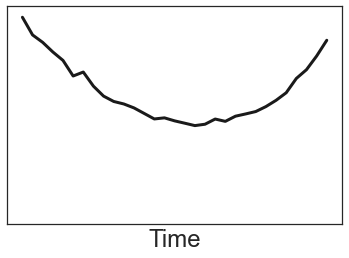

In [35]:
plt.plot(time, X_series +(noise_series*noise_cartoon_factor), lw=3, color='k');
plt.ylim(ylims)
plt.xlabel('Time', fontsize=24)
plt.xticks([]); plt.yticks([]); 
plt.show()

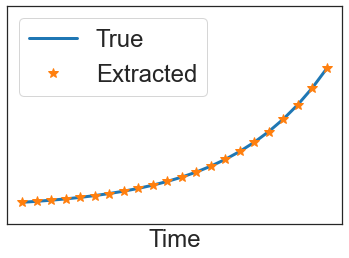

In [36]:
plt.plot(time[dim:], Y_series, label='True', lw=3);
plt.plot(time[dim:], pred_series, '*', label='Extracted', ms=10);
plt.legend(prop={'size': 24})
plt.ylim(ylims)
plt.xlabel('Time', fontsize=24)
plt.xticks([]); plt.yticks([]); 
plt.show()